# FCP

Project background

The compound of technologies we use to call 'AI' promises to revolutionize many sectors. However, there is a substantial gap between what firms say they do with AI and what they actually do with it [1]. Several factors could account for such a gap: the adoption of AI tools is costly since it tends to jeopardize an incumbent's operations [2]; there is a shortage of human capital trained in the area of AI [3]; developing AI applcations may require businesses to cope with ethical/societal implications [4, 5] and regulatory issues [6]. In the context of knowledge intensive industries, there is yet another obstacle to the diffusion of AI, namely, 'people.' While some professionals may be thrilled to integrate AI in their daily work, some others may just feel threatened. This FCP deals with the distribution of security traders opinions about the impact AI can make on 'trading floors.'

Aim & context

You're a 'quant' business analyst working for a consultancy company that has to help a client to sustain the diffusion of AI. Specifically, the client is a large investment bank that would like to persuade traders to engage more with AI tools when it comes evaluating securities.

Dataset

In order to get a better understanding of traders' attitudes toward AI, you have circulated a survey in a large trading floor located in Canary Wharf. The resulting dataset (trading_floor.xml) contains 192 responses regarding:

- the undirected network of knowledge exchange between traders (traders A and B are connected when A says he/she shares technical and industry knowledge with B and vice versa)
- a trader's opinion about the contribution of AI to his/her productivity and effectiveness in evaluating securities (1 = not at all; 10 = to a great extent). In the datasets, this variable is reported as the node attribute ai.

Thanks to the cooperation of the client, you also know the traders' location in the floor. There are six zones, each of which hosts 32 individuals (16 individuals on each side of the zone). The above-displayed picture gives you an idea of the layout of the trading floor. In the dataset, the location of traders is reported as two node attributes, that is, x-pos and y-pos.

Questions

1. How do traders' opinions map onto the knowledge exchange network?
2. How do traders' opinions map onto the physical layout of the trading floor?
3. What are the network-related obstacles to the diffusion of positive opinions about AI in the trading floor?
4. What is your recommendation to promote the diffusion of positive opinions about AI in the trading floor?

Deliverables

By Dec 17 (4:00 PM) you're supposed to upload onto Moodle a 800 word (max) document addressing questions 1 - 4 in plain English. The document must also contain the Python code and results ― being tables and/or charts ― supporting your answers. Code, tables, charts, and references do not count against the 800 word limit.

References

[1] Lanzolla, Gianvito, Simone Santoni, and Christopher Tucci. "Unlocking value from AI in financial services: strategic and organizational tradeoffs vs. media narratives." In Artificial Intelligence for Sustainable Value Creation. Edward Elgar Publishing, 2021.

[2] Agrawal, Ajay, Joshua Gans, and Avi Goldfarb. "Prediction machines: the simple economics of artificial intelligence." Harvard Business Press, 2018.

[3] Ross, Jeanne. "The fundamental flaw in AI implementation." MIT Sloan Management Review 59, no. 2 (2018): 10-11.

[4] Hajian, Sara, Francesco Bonchi, and Carlos Castillo. "Algorithmic bias: From discrimination discovery to fairness-aware data mining." In Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining, pp. 2125-2126. 2016.

[5] Akter, Shahriar, Grace McCarthy, Shahriar Sajib, Katina Michael, Yogesh K. Dwivedi, John D’Ambra, and K. N. Shen. "Algorithmic bias in data-driven innovation in the age of AI." (2021): 102387.

[6] Abbott, Ryan. "The reasonable robot: artificial intelligence and the law" Cambridge University Press, 2020.

# Import library 

In [1]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup

import networkx as nx 
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality
from networkx.algorithms.community import girvan_newman, modularity
import collections
from collections import Counter
import altair as alt
#from graspologic.plot import heatmap

from sklearn.metrics.pairwise import cosine_similarity 

import itertools

import plotly.graph_objects as go

import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.cm as cmx
import matplotlib.colors as colors
import plotly.express as px

import seaborn as sns 

from pprint import pprint as pp

import math 

In [2]:
from graspologic.plot import heatmap

/Users/hienanh/opt/anaconda3/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:373: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.List[scipy.sparse.csr.csr_matrix] deprecated by PEP 585 scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, either drop Python < 3.9 support and globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]") or see this discussion topic for saner and more portable solutions:
    https://github.com/beartype/beartype#pep-484-deprecations
  warn(
/Users/hienanh/opt/anaconda3/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:373: BeartypeDecorHintPep585DeprecationWarning: PEP 484 type hint typing.List[numpy.ndarray] deprecated by PEP 585 scheduled for removal in the first Python version released after October 5th, 2025. To resolve this, either drop Python < 3.9 support and globally replace this hint by the equivalent 

# Initialize graph

As this `trading_floor.xml` is the `grapml` file, we will use the command `read_graphml` to read the file.

In [3]:
G = nx.read_graphml('trading_floor.xml')

In [4]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['x_pos'], node[1]['y_pos']) for node in G.nodes(data=True)}

# Define data structure (list) of edge colors for plotting
node_ai = [n[1]['ai'] for n in G.nodes(data=True)] 

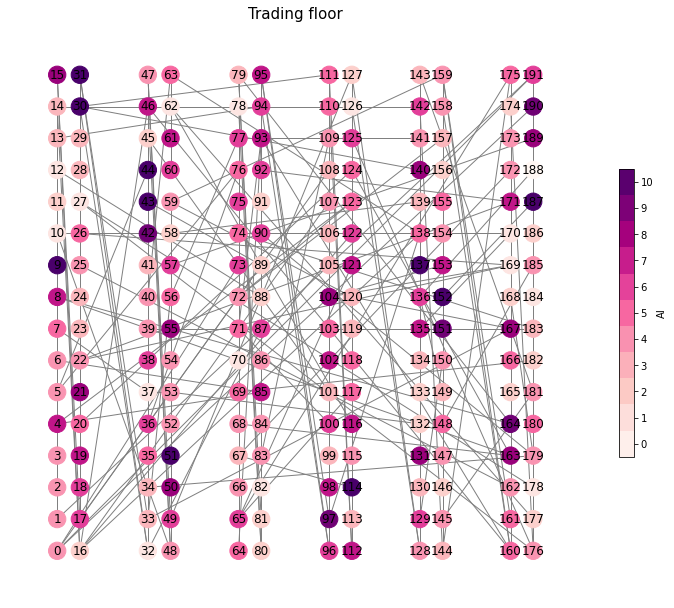

In [5]:
# % Plot
# Set up figure
plt.figure(figsize=(10, 8))

# Draw network
nx.draw(G, pos=node_positions, node_color=node_ai, 
             cmap = 'RdPu', node_size=300, with_labels = True, edge_color='grey')

# Set up color bar for nodes 'ai' attribute
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('RdPu'), 
                           norm=colors.Normalize(vmin=-0.5, vmax =10.5))
plt.colorbar(sm, 
             shrink=0.5,
             ticks=np.linspace(0, 10, 11),
             boundaries= np.linspace(-0.5,10.5,12)
            ).set_label('AI')

# Set up label and title
plt.title('Trading floor', size=15)

# Show
plt.show()  

This networks contains 192 nodes and 384 edges. 'Trading floor' illustrates how the network looks like. Each dot represented individual traders, which colors represent their preference for AI. The darker the color, the higher their evaluation for AI effectiveness. 

# Summary

In [6]:
# %% inspect the networkx
# basic info
pp(nx.info(G))

'Graph with 192 nodes and 384 edges'



AI preference [0,10]
    - Mean: 4.6875
    - Max: 10
    - Min: 0
    


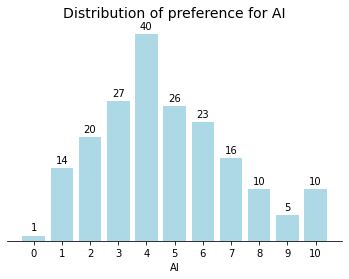

In [7]:
# --+ min, max, mean value for AI preference
list_ai = list(nx.get_node_attributes(G,'ai').values())
print(
"""
AI preference [0,10]
    - Mean: {}
    - Max: {}
    - Min: {}
    """.format(np.mean(list_ai), np.max(list_ai), np.min(list_ai))
)

# --+ Distribution of AI preference
# count 
ai_preference,count_ai = np.unique(list_ai, return_counts=True)
# plot
fig, ax = plt.subplots()
ai = ax.bar(x=range(len(ai_preference)), height=count_ai, color = 'lightblue')
ax.bar_label(ai, padding=3)
ax.set_xlabel('AI')
ax.set_xticks(range(len(ai_preference)))
ax.set_xticklabels(ai_preference)
ax.yaxis.set_visible(False)
ax.set_title('Distribution of preference for AI', size=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.show()

The mean value for AI preference is 4.68, with the range for AI opinion is from 0 to 10. Distribution of preference for AI shows that 4 is the most popular opinion among traders, followed by 3 and 5. It seems like traders are neutral when taking about the contribution of AI to their work. There might still be confussion in them for the productivity of AI. In others words, AI might not be superb effectiveness contributor for evaluation, still, it's not totally useless for predicting the values of securities.

# Descriptive statistic

## Degree distribution 

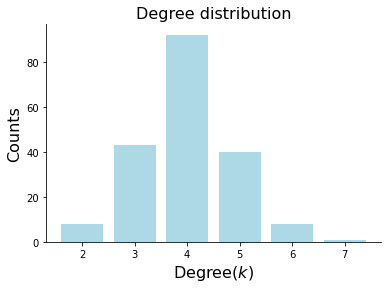

In [8]:
# --+ Count degree
l = [d for k,d in G.degree()] 
#k = Counter(l)

# Plot 
val,count = np.unique(l, return_counts=True)

fig, ax = plt.subplots()
ax.bar(x=range(len(val)), height=count, color = 'lightblue')

ax.set_xlabel('Degree($k$)',fontsize=16)
ax.set_ylabel('Counts',fontsize=16)
ax.set_title("Degree distribution",fontsize=16)
ax.set_xticks(range(len(val)))
ax.set_xticklabels(val)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

The distribution looks like a bell curve. There fore we might say that this is a random network. Howerever, we still need more investigation to come to the conclusion.

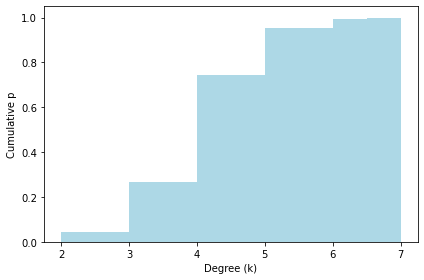

In [9]:
# --+ hist cumulative
node_degree = [degree for node, degree in nx.degree(G)]
n_bins=10
fig, ax = plt.subplots(tight_layout=True)
ax.hist(node_degree, density=True, cumulative=1, bins=n_bins, color = 'lightblue')
ax.set_xlabel('Degree (k)')
ax.set_ylabel('Cumulative p')
plt.show()

The probability of having more than 2 connection equal to 0.05. 

## Centrality measure 

           degree  betweenness  eigenvector
count  192.000000   192.000000   192.000000
mean     0.020942     0.019466     0.065368
std      0.004732     0.015258     0.030664
min      0.010471     0.000000     0.015691
25%      0.015707     0.008668     0.044292
50%      0.020942     0.016948     0.058667
75%      0.026178     0.025899     0.078747
max      0.036649     0.096939     0.202053


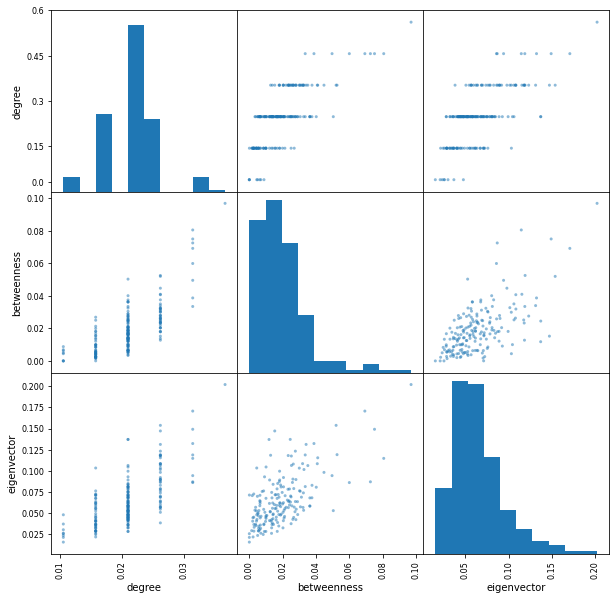

In [10]:
# --+ calculation
# --+ degree centrality
dc = nx.algorithms.degree_centrality(G)
# --+ betweenness centrality
bc = nx.algorithms.betweenness_centrality(G)
# --+ eigenvector centrality
ec = nx.algorithms.eigenvector_centrality(G)

# --+ pass to pandas
d = { "degree" : dc, "betweenness" : bc, "eigenvector" : ec}
df_c = pd.DataFrame(d)

# --+ get descriptive
print(df_c.describe())

# --+ pairplot
ax = pd.plotting.scatter_matrix(df_c, figsize=(10,10), range_padding=0.15)
ax[0,0].set_yticks([5, 25, 50, 75, 100])
ax[0,0].set_yticklabels([0.00, 0.15, 0.30, 0.45, 0.60])
plt.show()


Distribution of betweeness and eigenvector is left-skewed. We can see that most nodes in the this network have low betweenness centrality. Also, degree distributions tend to be right-skewed; that is, only a few nodes in most networks have most of the ties. 

In [11]:
df_b = pd.concat((pd.Series(bc.keys()), pd.Series(list_ai), pd.Series(i[1] for i in bc.items())), axis = 1)
df_b.columns = ['Nodes','AI','Betweeness']
df_b.sort_values(['Betweeness'], ascending=False, ignore_index = False)[0:30]

,Nodes,AI,Betweeness
138,138,5,0.096939
16,16,2,0.080555
170,170,1,0.075024
72,72,4,0.072564
136,136,6,0.069239
71,71,5,0.059935
169,169,1,0.052575
135,135,7,0.052009
123,123,5,0.050322
163,163,8,0.049580


# Community and Core-periphery detection

## Core-priphery detection 

<AxesSubplot:>

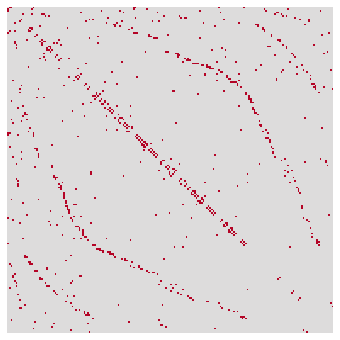

In [12]:
# %% Core-periphery
# --+ heatmap
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
heatmap(G, cmap='coolwarm', ax=ax, sort_nodes=True, cbar=False) 

Looking at this graph, we can say that this network is not a core-periphery. The reasons for saying so is that the cloud that gathers most of the red spots is not visible in the upper left corner of the figure, which is how a theoretical core-periphery dectection heatmap look likes. What we can see here is just dots forming the straightline.

## Community detection


Modularity_scores:
{2: 0.21760728624131942, 3: 0.32551066080729163, 4: 0.4218682183159722, 5: 0.48113335503472227, 6: 0.5144449869791667, 7: 0.6097005208333334, 8: 0.6259663899739584, 9: 0.6276143391927084, 10: 0.6319444444444445, 11: 0.6411404079861112, 12: 0.6458062065972222, 13: 0.648837619357639, 14: 0.649386935763889, 15: 0.6484442816840278, 16: 0.6481187608506944, 17: 0.6472642686631944, 18: 0.6470811631944443, 19: 0.6459486219618055, 20: 0.6425849066840278, 21: 0.6411268446180556}



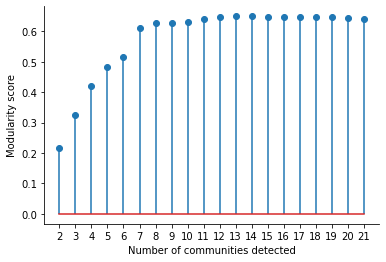

In [13]:
# %% use the modularity index to appreciate the quality of alternative
#    paritioning solutions
# fit
solutions = girvan_newman(G)
# alternative paritioning solutions to consider
k = 20
# register modularity scores
modularity_scores = dict()
# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    score = modularity(G, solution)
    modularity_scores[len(solution)] = score

# print modularity_scores 
print("""
Modularity_scores:
{}
""".format(modularity_scores))

# plot modularity data
fig = plt.figure()
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

It seems like the highest score of modularity is 14 communities, therefore we now see what 14 communities include

In [14]:
# %% Explore "optimal" k
# --+ fit
solutions_1 = girvan_newman(G)
# alternative paritioning solutions to consider
k_1 = 13
# register modularity scores
modularity_scores_1 = dict()
# iterate over solutions
for community in itertools.islice(solutions_1, k_1):
    solution_1 = list(sorted(c) for c in community) 
# let's check the solution, and see what inside
for community in solution_1:
    print(f'{len(community)}:{community}')

19:['0', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '95', '96', '97', '98', '99']
18:['1', '164', '2', '3', '4', '5', '6', '7', '78', '79', '8', '80', '81', '82', '83', '84', '85', '9']
15:['10', '11', '12', '13', '171', '64', '86', '87', '88', '89', '90', '91', '92', '93', '94']
11:['14', '142', '143', '144', '145', '180', '181', '182', '183', '73', '74']
9:['15', '159', '16', '160', '161', '46', '47', '48', '49']
22:['162', '165', '166', '167', '168', '169', '17', '170', '176', '177', '178', '179', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']
17:['137', '138', '139', '140', '141', '28', '29', '30', '31', '32', '33', '34', '35', '36', '75', '76', '77']
11:['37', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']
8:['38', '39', '40', '41', '42', '43', '44', '45']
12:['113', '114', '115', '116', '117', '118', '119', '120', '60', '61', '62', '63']
11:['121', '122', '123', '124', '125', '126', '127', '173', '174', '17

Most of the communities have more than 8 nodes, which means there are at least 8 people in each communities. None of them contains only one single node. Therefore we can say that there is 14 communities in this network.

Now let's add community into the attribute of each nodes, and then plot them in the network.

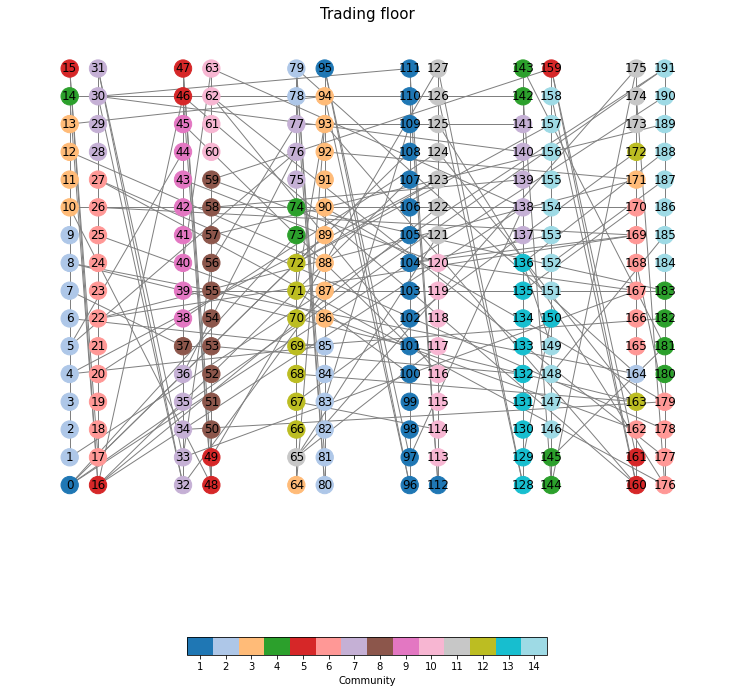

In [15]:
# % Generate node size
node_ai = [n[1]['ai']*30 for n in G.nodes(data=True)] 

# % Add nodes community attribute
for i, com in zip(range(1,15), solution_1):
    for no in G.nodes():
        if no in com:
            G.nodes[no]['com'] = i 
node_community = list(nx.get_node_attributes(G, "com").values())

# % Plot
# Set up figure
plt.figure(figsize=(10, 10))

# Draw network
nx.draw(G, pos=node_positions, node_color=node_community, 
             cmap = 'tab20', #node_size=node_ai, 
        with_labels = True, edge_color='grey')

# Set up color bar for nodes 'ai' attribute
cm = plt.get_cmap('tab20',14)
cNorm = colors.Normalize(vmin=0.5, vmax =14.5)
sm = plt.cm.ScalarMappable(cmap=cm, norm=cNorm)
plt.colorbar(sm, 
             shrink=0.5,
             ticks=np.linspace(1, 14, 14), location = 'bottom'
            ).set_label('Community')

# Set up label and title
plt.title('Trading floor', size=15)

# Show
plt.show()  

Text(0.5, 1.0, 'Nodes communities varies by degree centrality')

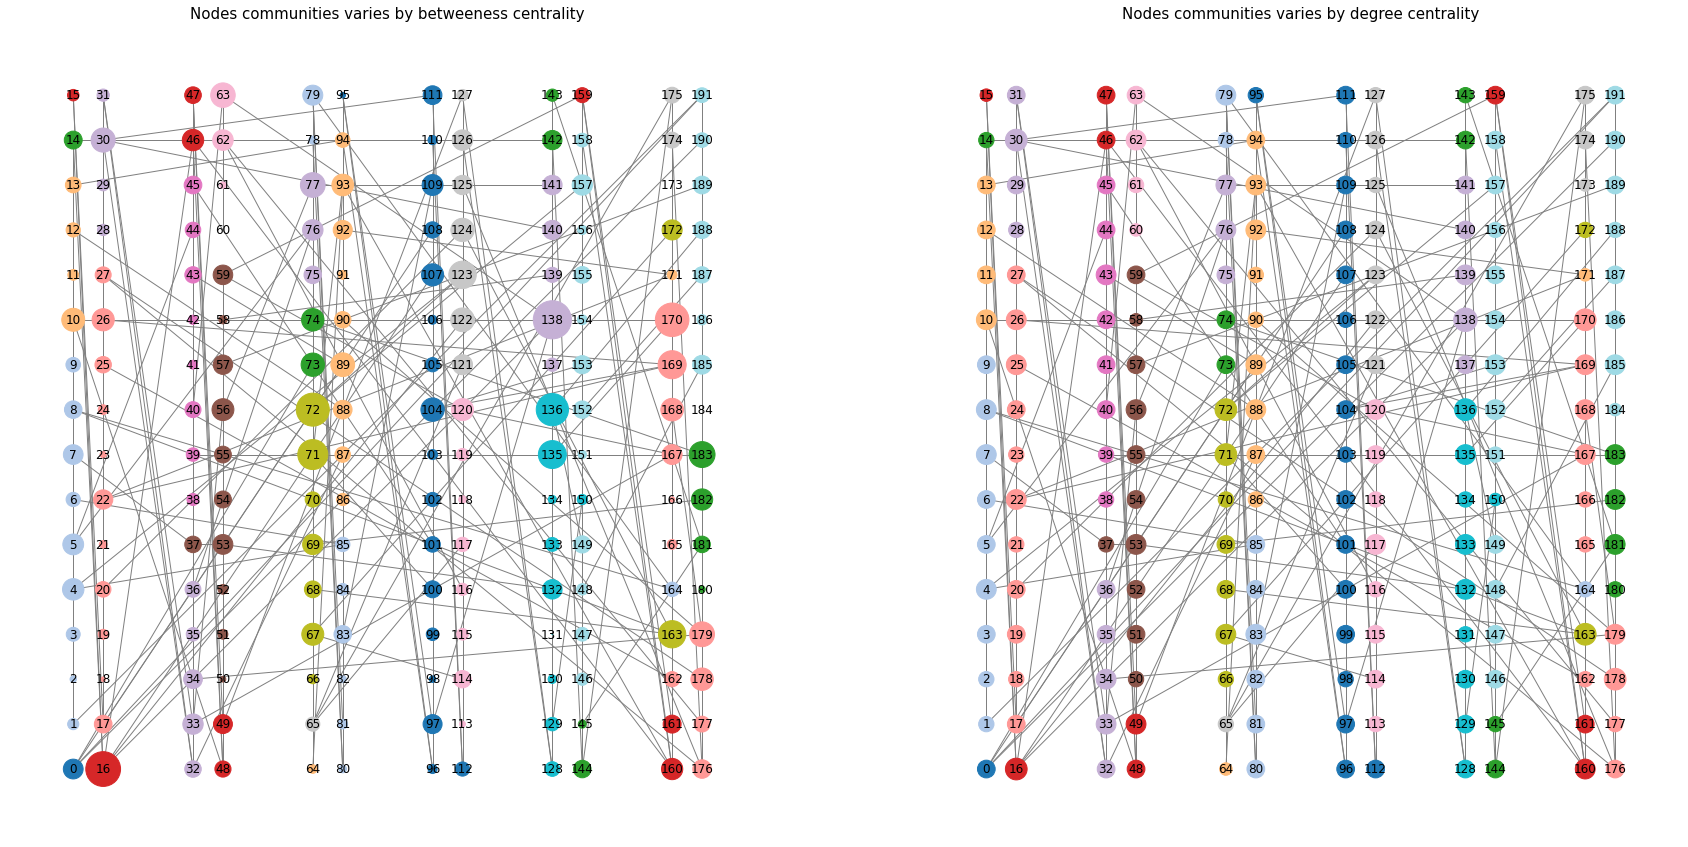

<Figure size 576x576 with 0 Axes>

In [16]:
fig = plt.figure(figsize=(30,15) )
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# % Generate node size
node_bc = [i[1]*15000 for i in bc.items()] 
node_dc = [i[1]*15000 for i in dc.items()] 

# % Add nodes community attribute
for i, com in zip(range(1,15), solution_1):
    for no in G.nodes():
        if no in com:
            G.nodes[no]['com'] = i 
node_community = list(nx.get_node_attributes(G, "com").values())

# % Plot
# Set up figure
plt.figure(figsize=(8, 8))

# % Draw network
# Betweeness centrality
nx.draw(G, pos=node_positions, node_color=node_community, 
             cmap = 'tab20', node_size=node_bc, 
        with_labels = True, edge_color='grey', ax = ax1)
ax1.set_title("Nodes communities varies by betweeness centrality", size=15)

# Degree centrality
nx.draw(G, pos=node_positions, node_color=node_community, 
             cmap = 'tab20', node_size=node_dc, 
        with_labels = True, edge_color='grey', ax = ax2)
ax2.set_title("Nodes communities varies by degree centrality", size=15)

It looks like most people who sit close to each other form a community

# At this point, we are pretty confident that our network has community structure

#  Q1. How do traders' opinions map onto the knowledge exchange network?

Knowledge exchange is a two-way exchange between traders, to share ideas, experiences and information related to AI.

In [17]:
# --+ check for AI gap
similarity = {}
check_list = []
for u, v in G.edges():
    key = "{}-{}".format(u, v)
    # ai gap 
    value = np.abs(G.nodes[u]["ai"] - G.nodes[v]["ai"])
    similarity[key] = round(value, 2)
    #check community 
    if G.nodes[u]['com'] == G.nodes[v]['com']:
        check = 'Same'
    else:
        check = 'Different'  
    check_list.append(check)

In [18]:
# --+ get dataframe
df1 = pd.concat((pd.Series(similarity.keys()), pd.Series(similarity.values()), pd.Series(check_list))
                   , axis=1)
df1.columns = ['Edges', 'AI gap', 'Community' ]
df1.head()

,Edges,AI gap,Community
0,0-191,2,Different
1,0-190,5,Different
2,0-108,1,Same
3,0-73,2,Different
4,1-2,0,Same


           AI gap
count  384.000000
mean     2.382812
std      2.013484
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      9.000000


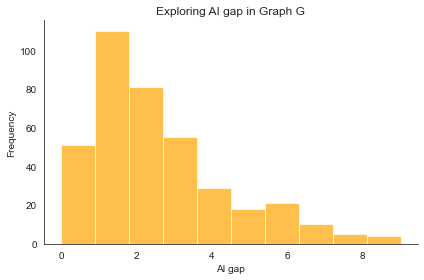

In [19]:
print(df1.describe() )
# --+ plot distribution of AI gap in whole network 
sns.set_style("white")
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df1['AI gap'] , cumulative=False, density=False, 
        color='orange', alpha=0.7, histtype='bar', align='mid')
#ax.vlines(2.382812, 0, 120, color ="grey", linestyles='dashed')
ax.set_xlabel(r'AI gap')
ax.set_ylabel(r'Frequency')
ax.set_title(r'Exploring AI gap in Graph G')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show() 

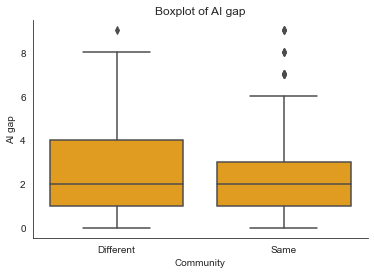

In [20]:
ax = sns.boxplot(x='Community', y='AI gap', data=df1, color='orange')
plt.title('Boxplot of AI gap')
plt.gca().spines['right'].set_visible( False )
plt.gca().spines['top'].set_visible( False )
plt.show()

Mean of AI gap between traders among the whole trading floor is 2.3, which indicates that there is no huge difference in their opinions for AI effectiveness. Besides, the left-skewed AI gap distribution in Figure 3.1 shows that mainly the gap in AI preference among traders is not too large. This can prove that if 2 nodes have similar opinion about the added value of AI, they would like to adopt to the same extent of AI. Furthermore, when investigating further into the AI gap between two nodes when they are in the same or different community, figure 3.2 shows that the node belongs to the same commnity have smaller gap in AI opinion than nodes in different community. As a result, traders in the same community shares more similar idea about the preference for AI in their work than to members of other communities, and traders opinion are exchanged in knowledge network.

# Q2. How do traders' opinions map onto the physical layout of the trading floor?

                0
count  384.000000
mean     0.918475
std      0.177110
min      0.066519
25%      0.958045
50%      0.995423
75%      0.998496
max      0.999985


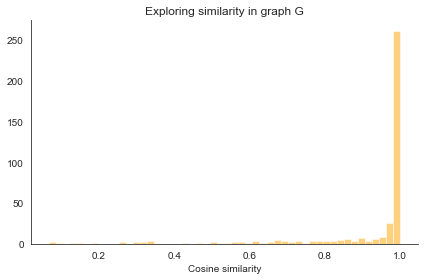

In [21]:
# %% Similarity
# --+ compute
similarity = {}
check_list = []
for u, v in G.edges():
    key = "{}-{}".format(u, v)
    u_att = [[G.nodes[u]["x_pos"], G.nodes[u]["y_pos"]] ]
    v_att = [[G.nodes[v]["x_pos"], G.nodes[v]["y_pos"]] ]
    value = cosine_similarity(u_att, v_att)
    similarity[key] = value
    if G.nodes[u]['com'] == G.nodes[v]['com']:
        check = 'same'
    else:
        check = 'different'  
    check_list.append(check)
# --+ get some descriptive
df_similarity = pd.DataFrame([i[0][0] for k, i in similarity.items()])
print(df_similarity.describe() )

# --+ plot distribution
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_similarity, bins=50, cumulative=False, density=False, 
        color='orange', alpha=0.5, histtype='bar')
ax.set_xlabel(r'Cosine similarity')
ax.set_title(r'Exploring similarity in graph G')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

The mean for the similarity if 0.91 for the maximum value of 0.99, which means that they are quite close to each other. Also, even we have the minimum value of 0.06, but when we looking at the percentile distribution, most of our values are higher than 0.95. In others word, we can say that our network does not contain so much different, traders tend to communicate with others, who have similar opinion about AI and close by.

In [22]:
df_similarity = pd.concat((pd.Series([i[0][0] for k, i in similarity.items()]), pd.Series(check_list)), axis=1)
df_similarity.columns = ['Similarity', 'Check']   
df_similarity.head()

,Similarity,Check
0,0.826227,different
1,0.843661,different
2,0.734803,same
3,0.707107,different
4,0.948683,same


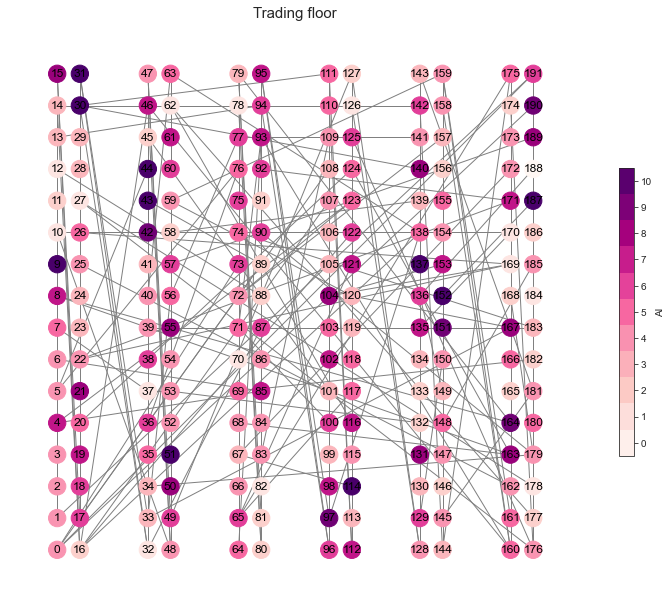

In [23]:
# % Plot
# Set up figure
plt.figure(figsize=(10, 8))

# Draw network
nx.draw(G, pos=node_positions, node_color=node_ai, 
             cmap = 'RdPu', node_size=300, with_labels = True, edge_color='grey')

# Set up color bar for nodes 'ai' attribute
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('RdPu'), 
                           norm=colors.Normalize(vmin=-0.5, vmax =10.5))
plt.colorbar(sm, 
             shrink=0.5,
             ticks=np.linspace(0, 10, 11),
             boundaries= np.linspace(-0.5,10.5,12)
            ).set_label('AI')

# Set up label and title
plt.title('Trading floor', size=15)

# Show
plt.show()  

The graph above depicts communities in the trading floor, with nodes of the same color representing the same community. It is easy to see that traders sitting close together will easily be in the same community, with similarity among traders within the community is quite high (Figure 3.2). Besides, as in Figure 1, nodes with bold colours tend to be close together, and the same goes for nodes with light colours, or nodes with similar colours. Some huge sequence of nodes, which have similar in colour, can be listed out like node 1 to 7, 10 to 13, 71 to 77 and 105 to 109. In other words, traders sitting close to each other’s tend to have similar opinions about AI's contribution to their work. 
Furthermore, most traders sitting next to each other are interconnected (except for nodes 0 and 1). Because of their relatively close distance, this is the shortest distance for information about AI to be transmitted in the easiest and fastest way. Hence, that is the reason why traders' opinions can be influenced by closers, who have the shortest physical distance from them.


# Q3. What are the network-related obstacles to the diffusion of positive opinions about AI in the trading floor?

Diffusion model has been carried into investigation, with pay-off for each nodes is calculated as their own preference for AI. According to the Granovetter threshold model, the “threshold” is “the number or proportion of others who must make one decision before a given actor does so”. In this research, threshold is set up to define “early adopters” (orange nodes), who preference for AI is above threshold value. In next stage, the adoption of AI can be facilitated under the diffusion of knowledge and preference for AI between traders, and “new adopters” (red nodes) may appear.

In [24]:
def plot(threshold):
    fig = plt.figure(figsize=(20, 8))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # %% initialize the diffusione process
    # parameters
    for k, ai in nx.get_node_attributes(G, 'ai').items():
        # pay-off of adopting the new behavior
        G.nodes[k]['a'] = round(ai/10,1)
        # pay-off of being not changing
        G.nodes[k]['b'] = round(1-ai/10,1)
    # initial state
    # --+ the list of adopters is empty
    adopters = []
    # --+ everybody sticks with the status quo
    #     let's create a node-level attribute reflecting adoption
    for node in G.nodes:
        G.nodes[node]["adopting"] = 0
        G.nodes[node]["early_adopting"] = 0
    # ----+ double-check attributes
    #pp(G.nodes.data())

    # %% model the diffusion process
    # at time 1 there are early adopters emerge 
    # --+ new adopters
    early_adopters = []
    #threshold = 6
    for no in G.nodes():
        if G.nodes[no]['ai'] >= threshold:
            early_adopters.append(no)
    for early in early_adopters:
        G.nodes[early]["early_adopting"] = 1
    # --+ expand the set of adopters
    adopters.extend(early_adopters)
    # --+ adopt node attributes
    for adopter in adopters:
        G.nodes[adopter]['adopting'] = 1

    # draw the network
    colors = []
    for n in G.nodes():
        if G.nodes[n]['early_adopting'] == 1:
            colors.append('orange')
        else:
            colors.append('white')
    nx.draw(G, pos=node_positions, with_labels=True, node_color=colors, edge_color='grey', ax=ax1)

    # %% let's simulate what happens in the following periods as nodes make decisions
    for focal, a, b in zip(G.nodes, nx.get_node_attributes(G,'a').values() , nx.get_node_attributes(G,'b').values() ):
        # count adopting neighbors
        focal_nbrs = list(G.neighbors(focal))
        p = np.sum([G.nodes[nbr]['adopting'] for nbr in focal_nbrs])
        # pay-off of adopting new behavior
        d = G.degree(focal)
        a_payoff = p * a
        b_payoff = (d - p ) * b
        # decision to adopt
        if (G.nodes[focal]['adopting'] == 0) & (a_payoff > b_payoff):
            G.nodes[focal]['adopting'] = 1
            adopters.extend(focal)
        else:
            pass

    # %% draw the network
    colors = []
    for n in G.nodes():
        if G.nodes[n]['early_adopting'] == 1:
            colors.append('orange')
        elif G.nodes[n]['adopting'] == 1 and G.nodes[n]['early_adopting'] == 0:
            colors.append('red')
        else:
            colors.append('white')
    nx.draw(G, pos=node_positions, with_labels=True, node_color=colors, edge_color='grey', ax=ax2)

    # Set up label and title
    plt.suptitle(f'Difussion of AI preference (#threshold = {threshold})', size=15)

    # Show
    plt.show()  

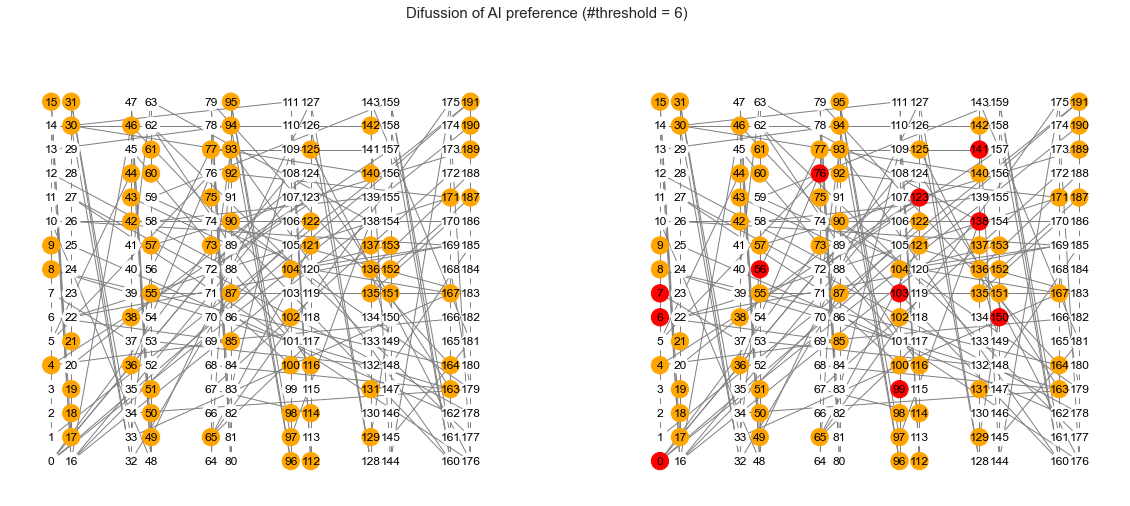

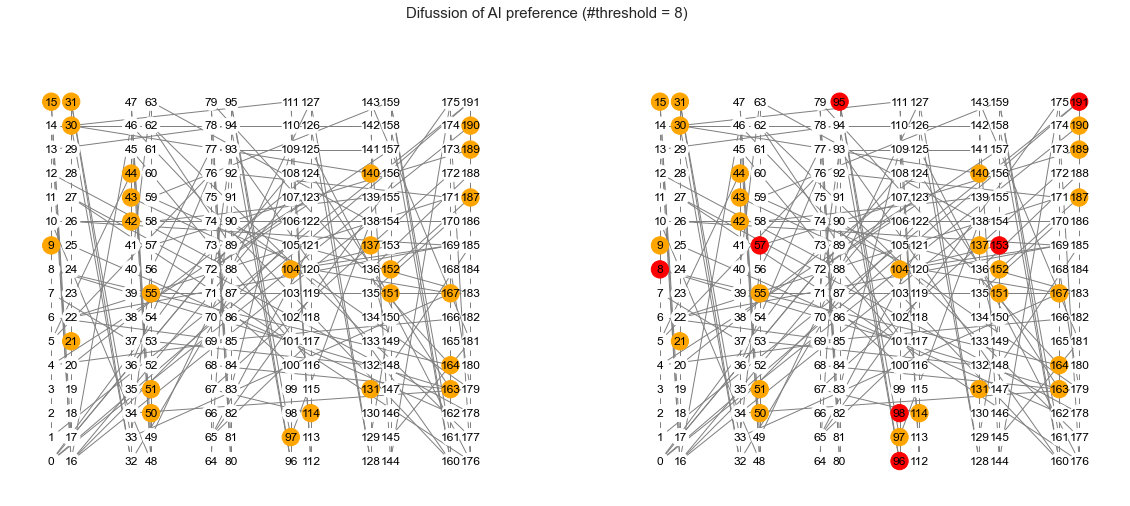

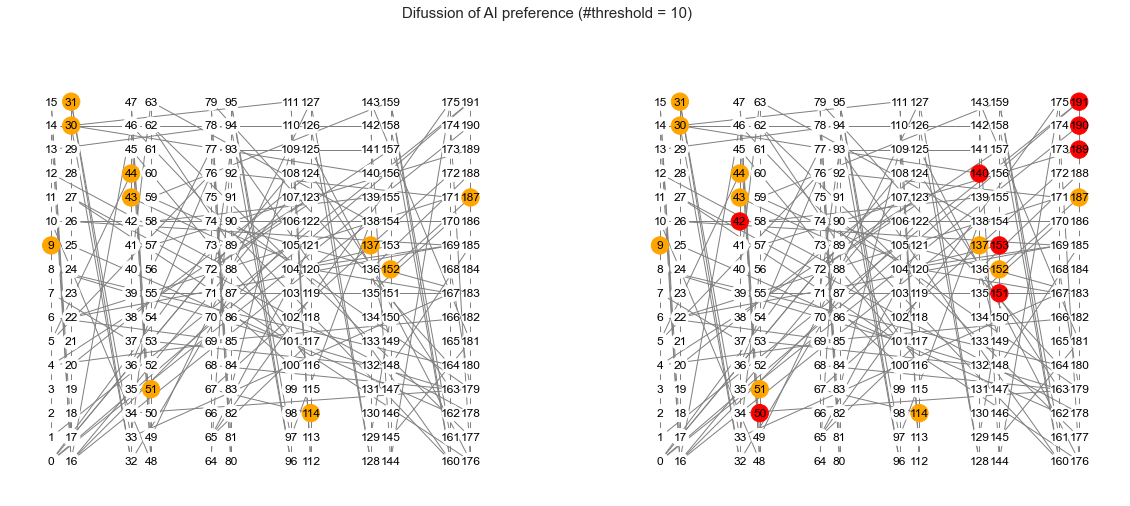

In [25]:
ax1 = plot(6)
ax2 = plot(8)
ax3 = plot(10)

In this research, 3 level of thresholds are tested: 6, 8, 10. Thresholds below than 6 are not tested because it would hardly to force someone with preference for AI below than 6 to adopt them. There are similarity among 3 diffusion, which is, diffusion mainly occurs around early adopters. This is explained by traders in the same community tend to interact with each other more as well as have higher similarity. When a trader acts as an early adopter, it becomes easier for them to spread a positive opinion about AI in their own community.
However, the number of new adopters at each threshold is quite small. Barriers for positive AI opinion diffusion is human, when traders try into break into others community. As mentioned above, the main preference for AI is neutral , especially nodes with high betweeness , even there are quite a few negative opinions about AI, making the pay-off for those traders to accept a change of opinion is lower than if they keep their opinion. Besides, when diffusion between communities occurs, it is quite difficult for positive AI opinion to pass through or affect nodes with negative opinion, when mainly around them there are many people who have similar opinions about it. don't appreciate AI.


# Q4. What is your recommendation to promote the diffusion of positive opinions about AI in the trading floor?

The importance of knowledge network and physical layout to traders opinion has been proved though out this research. Therefore, in order to promote the diffusion of positive opinions about AI, I recommend that investment banks should:
1. Change position of traders with high AI preference, especially those who rate 10 for AI, interspersed with traders who have negative opinion about it. Because as demonstrated above, these people will help create a community with people around, spreading their positive opinions about AI to their focal.
2. With a threshold of 6, managers can suggest traders with AI preference above this threshold to use AI, turning them into “early adopters” in our model. First, this is a reasonable threshold because after the diffusion phase, nearly half of the trading floor will adopt AI. Second, for a threshold lower than 6, we will need to force more people to adopt AI, some of whom also don't like it, so implementing policies is complicated and difficult. Third, this is already a higher-than-average preference for AI, so the manager can be smarter in implementing the policies, as well as maintaining trader’s job satisfaction.


# Reference 

Granovetter, M. Threshold Models of Collective Behavior. American Journal of Sociology 83, 1420–1443 (1978).

Karimi, F., & Holme, P. (2012). Threshold model of cascades in temporal networks. ArXiv, abs/1207.1206.